<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Processed Data</h4>
    <p style="font-size: 20px;">NBA API Seasons 2021-22 to 2023-24</p>
</div>

<a name="EDAp"></a>

# Table of Contents

[Setup](#Setup)

[Data](#Data)

**[1. Team Level Data](#1.-Team-Level-Data)**

- [1.1. Rolling Average Box Scores](#1.1.-Rolling-Average-Box-Scores)

# Setup

[Return to top](#EDAp)

In [1]:
import sys
from pathlib import Path
# get current working directory
cwd = %pwd
# add shared_code directory to Python sys.path
sys.path.append(str(Path(cwd).parent / "shared_code"))
# import all libraries in shared_code directory 'imports.py' file
from imports import *
%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Data

[Return to top](#EDAp)

In [2]:
team_bs_matchups_roll_df = pd.read_csv('../../data/processed/nba_team_matchups_rolling_box_scores_2022_2024_r05.csv')

# convert 'GAME_DATE' column to datetime
team_bs_matchups_roll_df['GAME_DATE'] = pd.to_datetime(team_bs_matchups_roll_df['GAME_DATE'])

In [3]:
team_bs_matchups_roll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172 entries, 0 to 3171
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GAME_ID            3172 non-null   int64         
 1   GAME_RESULT        3172 non-null   int64         
 2   TOTAL_PTS          3172 non-null   int64         
 3   PLUS_MINUS         3172 non-null   float64       
 4   HOME_TEAM_NAME     3172 non-null   object        
 5   SEASON_ID          3172 non-null   object        
 6   GAME_DATE          3172 non-null   datetime64[ns]
 7   ROLL_HOME_PTS      3082 non-null   float64       
 8   ROLL_HOME_FGM      3082 non-null   float64       
 9   ROLL_HOME_FGA      3082 non-null   float64       
 10  ROLL_HOME_FG_PCT   3082 non-null   float64       
 11  ROLL_HOME_FG3M     3082 non-null   float64       
 12  ROLL_HOME_FG3A     3082 non-null   float64       
 13  ROLL_HOME_FG3_PCT  3082 non-null   float64       
 14  ROLL_HOM

In [4]:
team_bs_matchups_roll_df.head()

,GAME_ID,GAME_RESULT,TOTAL_PTS,PLUS_MINUS,HOME_TEAM_NAME,SEASON_ID,GAME_DATE,ROLL_HOME_PTS,ROLL_HOME_FGM,ROLL_HOME_FGA,ROLL_HOME_FG_PCT,ROLL_HOME_FG3M,ROLL_HOME_FG3A,ROLL_HOME_FG3_PCT,ROLL_HOME_FTM,ROLL_HOME_FTA,ROLL_HOME_FT_PCT,ROLL_HOME_OREB,ROLL_HOME_DREB,ROLL_HOME_REB,ROLL_HOME_AST,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,AWAY_TEAM_NAME,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,ROLL_AWAY_FTM,ROLL_AWAY_FTA,ROLL_AWAY_FT_PCT,ROLL_AWAY_OREB,ROLL_AWAY_DREB,ROLL_AWAY_REB,ROLL_AWAY_AST,ROLL_AWAY_STL,ROLL_AWAY_BLK,ROLL_AWAY_TOV,ROLL_AWAY_PF
0,22100014,1,200,26.0,Atlanta Hawks,2021-22,2021-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dallas Mavericks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22100043,1,226,18.0,Atlanta Hawks,2021-22,2021-10-25,113.000,45.0,94.00,0.479,15.000,35.000,0.429,8.000,9.000,0.889,6.000,49.000,55.000,31.000,8.000,9.000,13.000,16.000,Detroit Pistons,82.000,34.000,88.000,0.386,5.000,28.000,0.179,9.00,15.00,0.600,11.000,42.00,53.000,14.0,9.00,8.000,20.00,17.00
2,22100097,1,229,7.0,Atlanta Hawks,2021-22,2021-11-01,117.500,45.5,92.00,0.495,13.500,33.500,0.402,13.000,15.000,0.873,8.000,44.000,52.000,27.500,9.500,6.000,13.000,17.500,Washington Wizards,101.333,37.333,86.667,0.434,7.667,30.333,0.259,19.00,25.00,0.761,9.333,41.00,50.333,18.0,9.00,6.667,16.00,18.00
3,22100120,0,214,-18.0,Atlanta Hawks,2021-22,2021-11-04,117.667,43.0,89.00,0.483,13.333,33.667,0.395,18.333,19.667,0.915,9.667,40.667,50.333,26.333,9.333,5.667,12.333,17.333,Utah Jazz,109.500,37.000,85.500,0.435,13.750,40.750,0.336,21.75,24.75,0.886,11.000,40.75,51.750,17.0,8.25,6.000,16.25,17.75
4,22100193,1,220,20.0,Atlanta Hawks,2021-22,2021-11-14,112.750,41.0,87.25,0.469,11.750,32.250,0.359,19.000,21.250,0.889,8.500,37.250,45.750,24.250,9.750,5.250,11.500,19.000,Milwaukee Bucks,110.800,41.400,92.200,0.450,16.800,41.800,0.396,11.20,16.00,0.703,12.400,36.00,48.400,23.6,7.40,4.800,12.00,15.80


In [5]:
team_bs_matchups_roll_df.describe()

,GAME_ID,GAME_RESULT,TOTAL_PTS,PLUS_MINUS,GAME_DATE,ROLL_HOME_PTS,ROLL_HOME_FGM,ROLL_HOME_FGA,ROLL_HOME_FG_PCT,ROLL_HOME_FG3M,ROLL_HOME_FG3A,ROLL_HOME_FG3_PCT,ROLL_HOME_FTM,ROLL_HOME_FTA,ROLL_HOME_FT_PCT,ROLL_HOME_OREB,ROLL_HOME_DREB,ROLL_HOME_REB,ROLL_HOME_AST,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,ROLL_AWAY_FTM,ROLL_AWAY_FTA,ROLL_AWAY_FT_PCT,ROLL_AWAY_OREB,ROLL_AWAY_DREB,ROLL_AWAY_REB,ROLL_AWAY_AST,ROLL_AWAY_STL,ROLL_AWAY_BLK,ROLL_AWAY_TOV,ROLL_AWAY_PF
count,3.172e+03,3172.000,3172.000,3172.000,3172,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000,3082.000
mean,2.220e+07,0.561,226.680,2.103,2022-11-10 04:52:48.726355456,114.112,41.784,88.512,0.473,12.634,34.949,0.361,17.909,22.927,0.781,10.511,33.842,44.353,25.543,7.494,4.928,13.180,19.736,111.938,41.081,88.437,0.465,12.263,34.567,0.354,17.513,22.536,0.778,10.434,33.161,43.596,24.814,7.463,4.718,13.398,19.969
min,2.210e+07,0.000,169.000,-56.000,2021-10-19 00:00:00,83.000,30.000,75.800,0.309,5.000,22.000,0.172,5.000,8.000,0.438,4.000,22.000,29.000,14.000,3.200,0.000,6.400,13.800,82.000,30.000,75.000,0.333,5.000,22.000,0.172,5.000,9.000,0.529,4.000,20.000,29.000,14.000,2.000,0.000,7.000,11.000
25%,2.210e+07,0.000,213.000,-8.000,2022-02-06 00:00:00,109.000,39.800,85.800,0.452,11.000,31.600,0.334,15.800,20.400,0.745,9.000,32.000,41.800,23.400,6.400,4.000,11.800,18.400,107.000,39.000,85.600,0.446,10.600,31.200,0.326,15.600,20.200,0.743,9.000,31.200,41.200,22.800,6.400,3.800,12.000,18.400
50%,2.220e+07,1.000,226.000,3.000,2022-12-07 00:00:00,114.400,41.800,88.200,0.474,12.500,34.600,0.361,17.800,22.800,0.784,10.400,33.800,44.200,25.400,7.400,4.800,13.000,19.800,112.000,41.000,88.200,0.465,12.000,34.200,0.353,17.400,22.400,0.782,10.200,33.000,43.400,24.600,7.400,4.600,13.200,19.800
75%,2.220e+07,1.000,240.000,11.000,2023-04-02 00:00:00,119.200,43.800,91.000,0.494,14.000,38.000,0.390,20.000,25.400,0.818,11.800,35.600,46.600,27.600,8.400,5.800,14.600,21.000,116.729,43.000,91.000,0.485,13.667,37.787,0.381,19.400,25.000,0.815,11.800,35.000,45.800,26.800,8.400,5.600,14.788,21.400
max,6.230e+07,1.000,351.000,73.000,2024-02-04 00:00:00,143.000,56.000,108.000,0.584,20.600,50.000,0.526,35.000,40.000,1.000,20.200,49.000,64.000,38.000,18.000,17.000,25.000,29.000,138.600,52.200,117.000,0.570,24.000,57.000,0.548,32.000,44.000,1.000,21.000,48.000,62.000,39.000,16.000,13.000,30.000,30.000
std,7.164e+05,0.496,20.357,14.672,NaN,7.462,3.003,4.001,0.031,2.258,4.520,0.043,3.277,3.838,0.055,2.175,2.953,3.698,3.100,1.544,1.413,2.035,2.081,7.173,2.949,4.066,0.030,2.239,4.532,0.041,2.980,3.620,0.055,2.263,2.981,3.660,2.991,1.546,1.373,2.153,2.290


<a name="1.-Team-Level-Data"></a>
# 1. Team Level Data

[Return to top](#EDAp)

<a name="1.1.-Rolling-Average-Box-Scores"></a>
## 1.1. Rolling Average Box Scores

[Return to top](#EDAp)

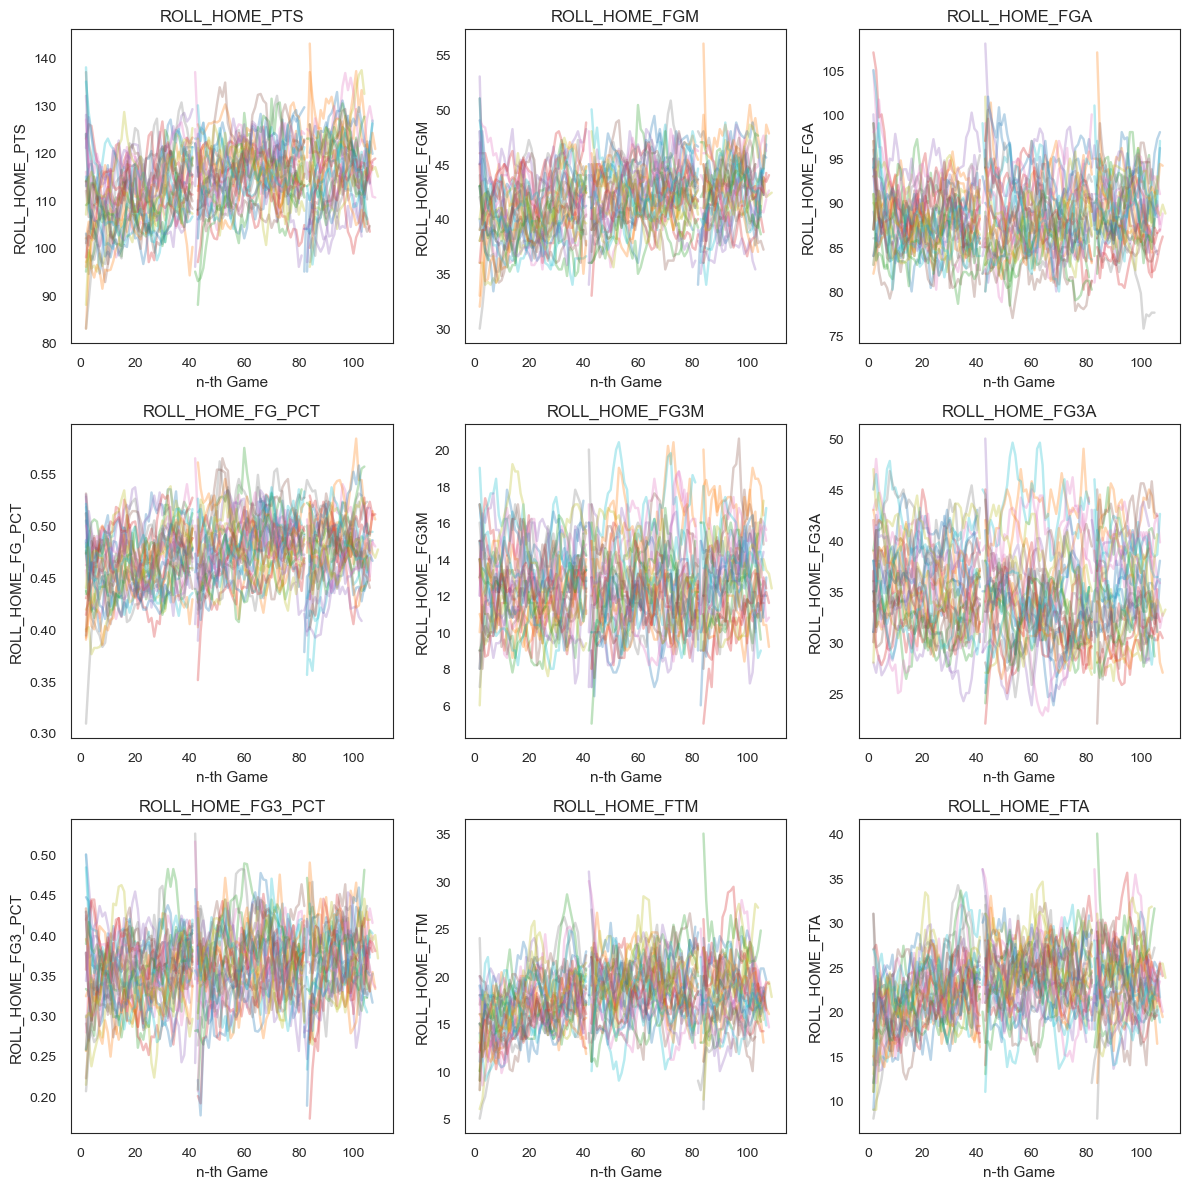

In [6]:
# plot for Home Teams
utl.plot_team_bs_stats(team_bs_matchups_roll_df, 'HOME_TEAM_NAME', 'ROLL_HOME_')

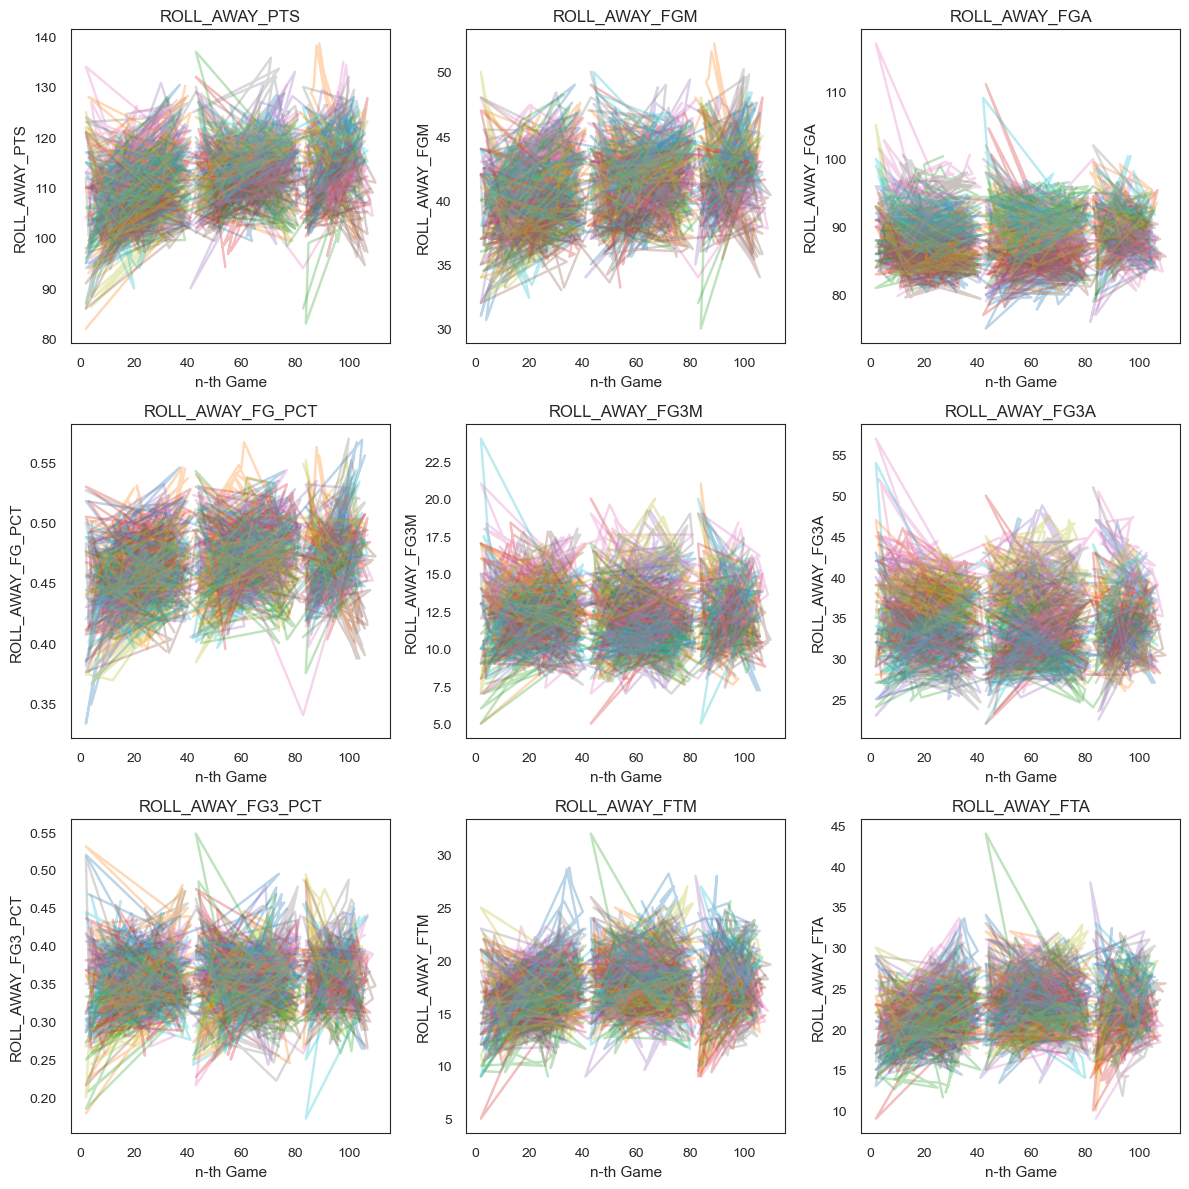

In [7]:
# plot for Away Teams
utl.plot_team_bs_stats(team_bs_matchups_roll_df, 'AWAY_TEAM_NAME', 'ROLL_AWAY_')